# Simulação com Valor do Aço


Ilustração de como gerar experimentos com um dataset custom e treinar o melhor modelo para ele.

In [1]:
import sys
sys.path.append('../..')

In [2]:
# Valores por Tonelada (à esquerda e direita). Afeta o slope (que pode ser negativo ou positivo)
y0 = 8500
yf = 9500
time_range = 365


## Gera Dados

In [12]:
import tensorflow as tf
from numpy import arange
import tensorflow_datasets as tfds
import numpy as np

from model_compra_comigo.experimenter import Experimenter
from model_compra_comigo.data_handler.data_simulator import DataSimulator
from model_compra_comigo.data_handler import DataHandler
from model_compra_comigo.data_handler.utils import plot_series


In [4]:
data_simulator = DataSimulator()
data_handler = DataHandler()


In [10]:
generate_new = False

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


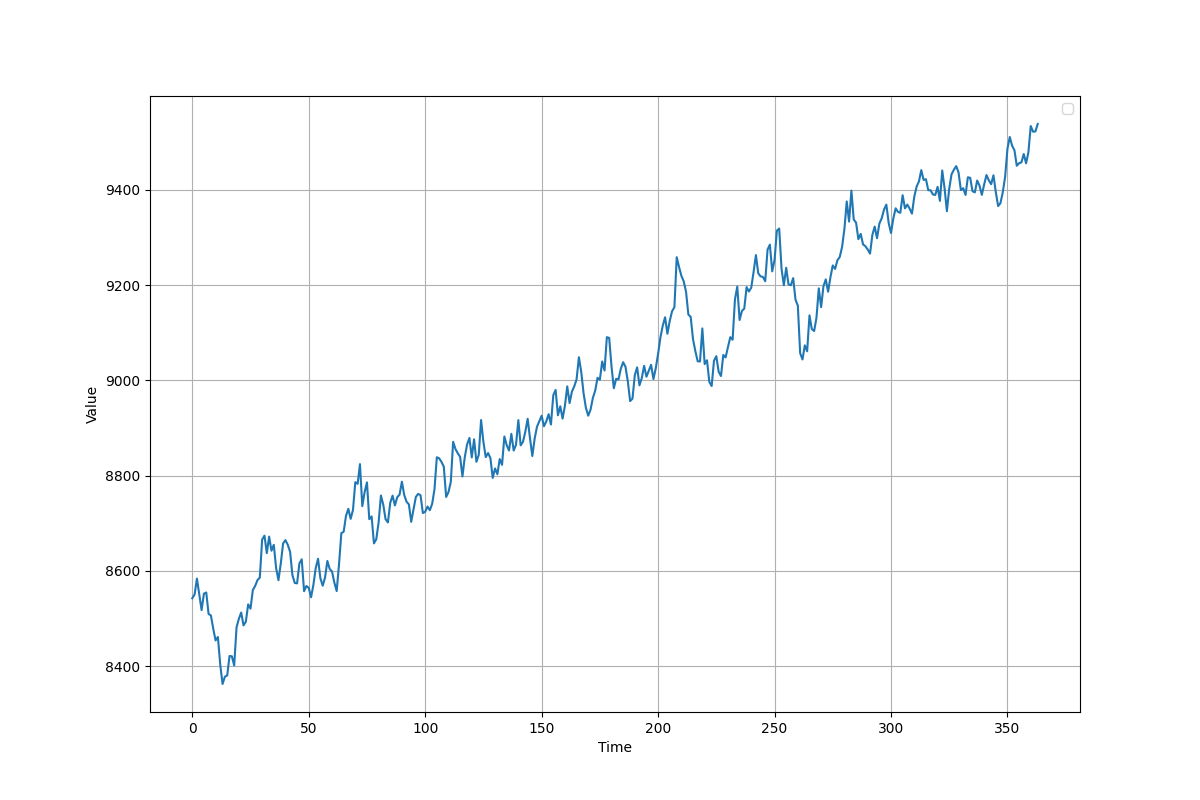

In [9]:
if generate_new:
    time_data = arange(time_range)
    series, parameters = data_simulator.generate(
        time_range = time_range,
        trend_slope=(yf-y0)/time_range,
        c = y0
    )
    
    labels=[(f"trend_slope = {parameters['trend_slope']}\n"
             f"seasonality_period = {parameters['seasonality_period']}\n"
             f"seasonality_amplitude = {parameters['seasonality_amplitude']}\n"
             f"seasonality_phase = {parameters['seasonality_phase']}\n"
             f"seasonality_time_threshold = {parameters['seasonality_time_threshold']}\n"
             f"seasonality_ncos = {parameters['seasonality_ncos']}\n"
             f"seasonality_nexp = {parameters['seasonality_nexp']}\n"
             f"noise_scaling_factor = {parameters['noise_scaling_factor']}\n"
             f"autocorrelation_amplitude = {parameters['autocorrelation_amplitude']}\n"
             f"autocorrelation_phi = {parameters['autocorrelation_phi']}"
            )]
    
    data_handler.plot_series(
        time=time_data,
        series=series,
        labels=labels
    )


### Save Dataset

In [22]:
dataset_path_csv = "./tmp/dataset_exemplo.csv"

In [26]:
if generate_new:
    arr = np.column_stack([time_data, series])
    DataHandler.save_dataset(
        dataset=arr,
        path=dataset_path_csv,
        columns=["dias", "target"]
    )

## Load Dataset

In [30]:
time_data, series = DataHandler.read_dataset(
    path=dataset_path_csv,
    data_type="numpy",
)
data_handler.plot_series(
    time=time_data,
    series=series,
    labels=labels
)

## Exemplo Rede Neural

### 